In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data (1).csv',encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Null value checkup**

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [ ]:
df.shape

(406829, 8)

In [ ]:
df['Description'].shape

(406829,)

Use Natural Language Processing techniques to convert text to numerical data

In [ ]:
df_p=pd.DataFrame(df['Description'].unique()).rename(columns={0:'Description'})

In [ ]:
df_p.shape
print(df_p)

                              Description
0      WHITE HANGING HEART T-LIGHT HOLDER
1                     WHITE METAL LANTERN
2          CREAM CUPID HEARTS COAT HANGER
3     KNITTED UNION FLAG HOT WATER BOTTLE
4          RED WOOLLY HOTTIE WHITE HEART.
...                                   ...
3891            LETTER "W" BLING KEY RING
3892            LETTER "Z" BLING KEY RING
3893       PINK CRYSTAL SKULL PHONE CHARM
3894   CREAM HANGING HEART T-LIGHT HOLDER
3895          PAPER CRAFT , LITTLE BIRDIE

[3896 rows x 1 columns]


**Replacing punctuations and other special characters with space**

In [ ]:
df_p['Description']=df_p['Description'].str.replace("[^a-zA-Z0-9]"," ")
df_p['Description']

<ipython-input-12-14a34f12fcf0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_p['Description']=df_p['Description'].str.replace("[^a-zA-Z0-9]"," ")


0        WHITE HANGING HEART T LIGHT HOLDER
1                       WHITE METAL LANTERN
2            CREAM CUPID HEARTS COAT HANGER
3       KNITTED UNION FLAG HOT WATER BOTTLE
4            RED WOOLLY HOTTIE WHITE HEART 
                       ...                 
3891              LETTER  W  BLING KEY RING
3892              LETTER  Z  BLING KEY RING
3893         PINK CRYSTAL SKULL PHONE CHARM
3894     CREAM HANGING HEART T LIGHT HOLDER
3895            PAPER CRAFT   LITTLE BIRDIE
Name: Description, Length: 3896, dtype: object

**Removing short words**


In [ ]:
df_p['Description']=df_p['Description'].apply(lambda x:" ".join([w for w in x.split() if len(w)>2]))
df_p['Description']

0          WHITE HANGING HEART LIGHT HOLDER
1                       WHITE METAL LANTERN
2            CREAM CUPID HEARTS COAT HANGER
3       KNITTED UNION FLAG HOT WATER BOTTLE
4             RED WOOLLY HOTTIE WHITE HEART
                       ...                 
3891                  LETTER BLING KEY RING
3892                  LETTER BLING KEY RING
3893         PINK CRYSTAL SKULL PHONE CHARM
3894       CREAM HANGING HEART LIGHT HOLDER
3895              PAPER CRAFT LITTLE BIRDIE
Name: Description, Length: 3896, dtype: object

**Converting into lowercase**

In [ ]:
df_p['Description']=[rev.lower() for rev in df_p['Description']]
df_p['Description']

0          white hanging heart light holder
1                       white metal lantern
2            cream cupid hearts coat hanger
3       knitted union flag hot water bottle
4             red woolly hottie white heart
                       ...                 
3891                  letter bling key ring
3892                  letter bling key ring
3893         pink crystal skull phone charm
3894       cream hanging heart light holder
3895              paper craft little birdie
Name: Description, Length: 3896, dtype: object

**Removing stopwords**

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk import word_tokenize
stop_words = stopwords.words('english')
add_words=['pink','red','white','green','black']
stop_words.extend(add_words)

def remove_stopwords(text):
  text_tokenize=word_tokenize(text)
  text_new=" ".join([i for i in text_tokenize if i not in stop_words])
  return text_new

df_p['Description']=[remove_stopwords(r) for r in df_p['Description']]

**Lemmatization**

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('v'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:
    return None

def lemmatize_sent(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df_p["Description"] = df_p["Description"].apply(lambda x: lemmatize_sent(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df_p["Description"]

0       hanging
1         metal
2         cream
3       knitted
4        woolly
         ...   
3891     letter
3892     letter
3893    crystal
3894      cream
3895      paper
Name: Description, Length: 3896, dtype: object

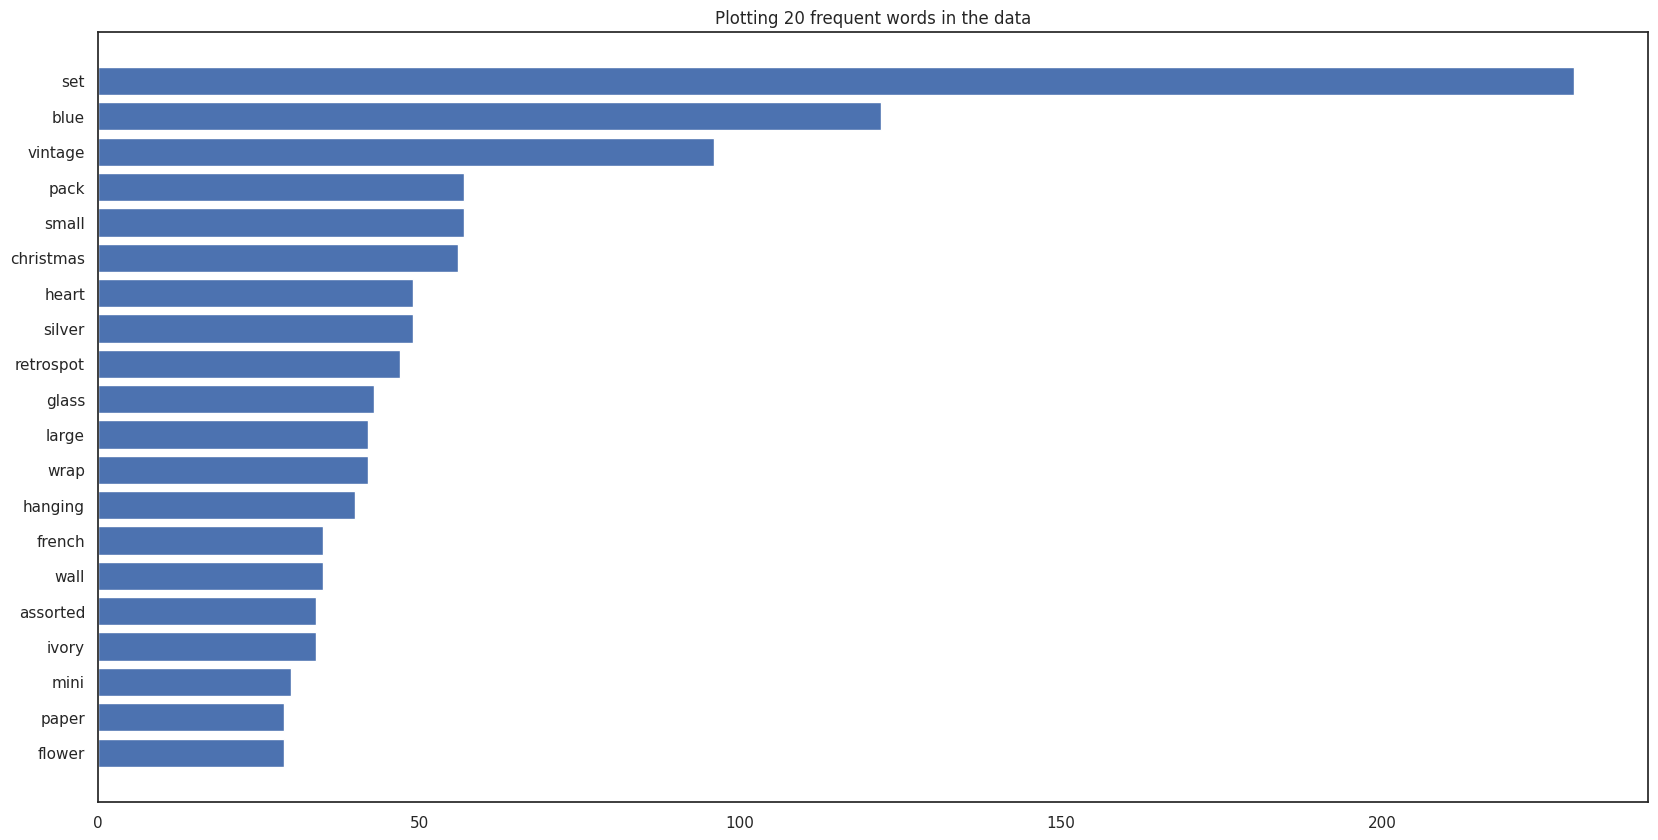

In [ ]:
sns.set(style = 'white')
from nltk import FreqDist
all_words=df_p['Description']

all_word=" ".join([text for text in all_words])
all_word=all_word.split()
words_df = FreqDist(all_words)
words_df=pd.DataFrame({'word':list(words_df.keys()),'count':list(words_df.values())})
words_df
words_df = words_df.nlargest(columns="count", n = 20)

words_df.sort_values('count', inplace = True)
plt.figure(figsize=(20,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.title("Plotting 20 frequent words in the data")
plt.show()

# **Bag of words model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

tfidf=TfidfVectorizer(max_features=2000)
data_decrp=tfidf.fit_transform(df_p["Description"]).toarray()
featurename=tfidf.get_feature_names_out()

In [ ]:
data_decrp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Calculating Silhouette_score**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.03912226775028777
For n_clusters = 3 The average silhouette_score is : 0.068275716576209
For n_clusters = 4 The average silhouette_score is : 0.10681377132683643
For n_clusters = 5 The average silhouette_score is : 0.10513212239696003
For n_clusters = 6 The average silhouette_score is : 0.1360314933842354
For n_clusters = 7 The average silhouette_score is : 0.12776912676276378
For n_clusters = 8 The average silhouette_score is : 0.16321423933361828


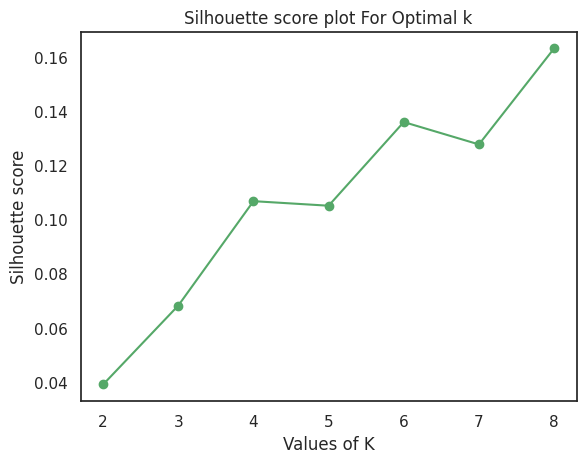

In [ ]:
score_avg=[]
n_clusters=[2,3,4,5,6,7,8]
for i in n_clusters:
  kmeans=KMeans(n_clusters=i,n_init=10,random_state=0)
  kmeans.fit(data_decrp)
  clusters=kmeans.predict(data_decrp)
  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(data_decrp, clusters)
  print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
  score_avg.append(silhouette_score(data_decrp, cluster_labels))
plt.plot(n_clusters,score_avg,'go-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette score plot For Optimal k')
plt.show()

In [ ]:
best_cluster=5
kmeans=KMeans(n_clusters=best_cluster,random_state=0)
kmeans.fit(data_decrp)
result=kmeans.predict(data_decrp)
df_p['cluster_group']=pd.Series(result)

df_p.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Description,cluster_group
0,hanging,0
1,metal,0
2,cream,0
3,knitted,0
4,woolly,0


**Adding Product Categories as a New column to the original datatset**


In [ ]:
products_list = df['Description'].unique()

In [ ]:
corresp = dict()
for key, val in zip (products_list, result):
    corresp[key] = val

df['product_categ'] = df.loc[:, 'Description'].map(corresp)


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product_categ
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,0


In [ ]:
prd_cat=pd.get_dummies(df['product_categ'],prefix = 'prod_categ')
prd_cat

,prod_categ_0,prod_categ_1,prod_categ_2,prod_categ_3,prod_categ_4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
541904,1,0,0,0,0
541905,1,0,0,0,0
541906,1,0,0,0,0
541907,1,0,0,0,0


In [ ]:
df_products = pd.concat([df,prd_cat],axis=1)
df_products.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product_categ,prod_categ_0,prod_categ_1,prod_categ_2,prod_categ_3,prod_categ_4
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,1,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,1,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0


In [ ]:
df_copy=df_products.copy(deep=True)
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product_categ,prod_categ_0,prod_categ_1,prod_categ_2,prod_categ_3,prod_categ_4
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,1,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,1,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0


In [ ]:
df_copy=df_copy[df_copy['UnitPrice']!=0]

In [ ]:
df_copy=df_copy.drop(columns =['InvoiceNo','StockCode', 'product_categ', 'Quantity'])

In [ ]:
df_copy

,Description,InvoiceDate,UnitPrice,CustomerID,Country,prod_categ_0,prod_categ_1,prod_categ_2,prod_categ_3,prod_categ_4
0,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,0,0,0,0
1,WHITE METAL LANTERN,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,0,0,0,0
2,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,0,0,0,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,0,0,0,0
4,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12/9/2011 12:50,0.85,12680.0,France,1,0,0,0,0
541905,CHILDREN'S APRON DOLLY GIRL,12/9/2011 12:50,2.10,12680.0,France,1,0,0,0,0
541906,CHILDRENS CUTLERY DOLLY GIRL,12/9/2011 12:50,4.15,12680.0,France,1,0,0,0,0
541907,CHILDRENS CUTLERY CIRCUS PARADE,12/9/2011 12:50,4.15,12680.0,France,1,0,0,0,0


In [ ]:
trans = df_copy.groupby(by=['CustomerID']).mean()
trans

<ipython-input-35-724d044a6237>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trans = df_copy.groupby(by=['CustomerID']).mean()


,UnitPrice,prod_categ_0,prod_categ_1,prod_categ_2,prod_categ_3,prod_categ_4
CustomerID,,,,,,
12346.0,1.040000,1.000000,0.000000,0.000000,0.000000,0.000000
12347.0,2.644011,0.939560,0.016484,0.000000,0.043956,0.000000
12348.0,5.764839,0.903226,0.000000,0.000000,0.096774,0.000000
12349.0,8.289041,0.739726,0.027397,0.027397,0.164384,0.041096
12350.0,3.841176,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
18280.0,4.765000,0.800000,0.100000,0.000000,0.100000,0.000000
18281.0,5.622857,1.000000,0.000000,0.000000,0.000000,0.000000
18282.0,4.821538,0.923077,0.000000,0.000000,0.076923,0.000000


In [ ]:
import numpy as np
para=np.array(trans)
para

array([[1.04000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.64401099e+00, 9.39560440e-01, 1.64835165e-02, 0.00000000e+00,
        4.39560440e-02, 0.00000000e+00],
       [5.76483871e+00, 9.03225806e-01, 0.00000000e+00, 0.00000000e+00,
        9.67741935e-02, 0.00000000e+00],
       ...,
       [4.82153846e+00, 9.23076923e-01, 0.00000000e+00, 0.00000000e+00,
        7.69230769e-02, 0.00000000e+00],
       [1.61498677e+00, 9.24603175e-01, 2.51322751e-02, 5.29100529e-03,
        4.23280423e-02, 2.64550265e-03],
       [1.49357143e+00, 7.71428571e-01, 0.00000000e+00, 2.85714286e-02,
        2.00000000e-01, 0.00000000e+00]])

**scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(para)
scaled_matrix = scaler.transform(para)
scaled_matrix

array([[1.13895110e-04, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.13011196e-04, 9.39560440e-01, 1.64835165e-02, 0.00000000e+00,
        4.39560440e-02, 0.00000000e+00],
       [7.00419390e-04, 9.03225806e-01, 0.00000000e+00, 0.00000000e+00,
        9.67741935e-02, 0.00000000e+00],
       ...,
       [5.83321530e-04, 9.23076923e-01, 0.00000000e+00, 0.00000000e+00,
        7.69230769e-02, 0.00000000e+00],
       [1.85271875e-04, 9.24603175e-01, 2.51322751e-02, 1.05820106e-02,
        4.23280423e-02, 3.52733686e-03],
       [1.70199817e-04, 7.71428571e-01, 0.00000000e+00, 5.71428571e-02,
        2.00000000e-01, 0.00000000e+00]])

For n_clusters = 2 The average silhouette_score is : 0.4797346217905314
For n_clusters = 3 The average silhouette_score is : 0.3734172268624864
For n_clusters = 4 The average silhouette_score is : 0.3543937007986268
For n_clusters = 5 The average silhouette_score is : 0.3635788155544028
For n_clusters = 6 The average silhouette_score is : 0.3728881665515096
For n_clusters = 7 The average silhouette_score is : 0.39319386528067507
For n_clusters = 8 The average silhouette_score is : 0.3688749349585715


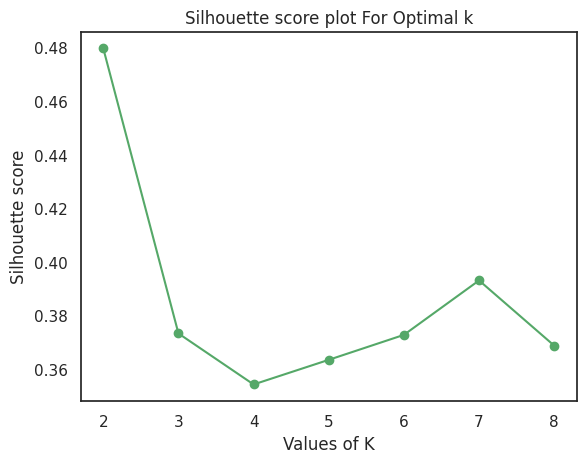

In [ ]:
score_avg=[]
n_clusters=[2,3,4,5,6,7,8]
for i in n_clusters:
  kmeans=KMeans(n_clusters=i,n_init=10,random_state=0)
  kmeans.fit(scaled_matrix)
  clusters=kmeans.predict(scaled_matrix)
  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(scaled_matrix,clusters)
  print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)
  score_avg.append(silhouette_score(scaled_matrix, cluster_labels))
plt.plot(n_clusters,score_avg,'go-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette score plot For Optimal k')
plt.show()

In [ ]:
best_cluster=3
kmeans=KMeans(n_clusters=best_cluster,random_state=0)
kmeans.fit(data_decrp)
result1=kmeans.predict(data_decrp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pd.DataFrame(pd.Series(result).value_counts(),columns=['no of cluster'])

,no of cluster
0,3505
3,230
1,96
4,49
2,16


In [ ]:
df_products=df_products[df_products['UnitPrice']!=0]

In [ ]:
df_products=df_products[df_products['Quantity']>0]

**Adding customer category data into the original dataset**

In [ ]:
customers_list = df_products['CustomerID'].unique()

In [ ]:
corresp = dict()
for key, val in zip (customers_list, result1):
    corresp[key] = val

df_products['customer_categ'] = df.loc[:, 'CustomerID'].map(corresp)

In [ ]:
df_products.set_index('customer_categ',inplace=True)

In [ ]:
df_products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,product_categ,prod_categ_0,prod_categ_1,prod_categ_2,prod_categ_3,prod_categ_4
customer_categ,,,,,,,,,,,,,,
1.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0,1,0,0,0,0
1.0,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0
1.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0,1,0,0,0,0
1.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0
1.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.0,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,0,1,0,0,0,0
1.0,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,0,1,0,0,0,0
1.0,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,0,1,0,0,0,0


**plotting**

In [ ]:
UnitPrice = df_products.groupby(by=['customer_categ'])['UnitPrice'].mean()
UnitPrice

customer_categ
0.0    2.980377
1.0    3.120733
2.0    3.406858
Name: UnitPrice, dtype: float64

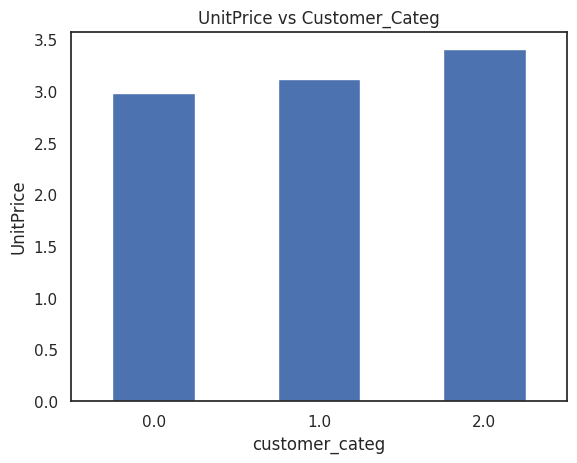

In [ ]:
(df_products.groupby(by=['customer_categ'])['UnitPrice'].mean().plot(kind='bar'))
plt.title("UnitPrice vs Customer_Categ")
plt.ylabel("UnitPrice")
plt.xticks(rotation = 0)
plt.show()

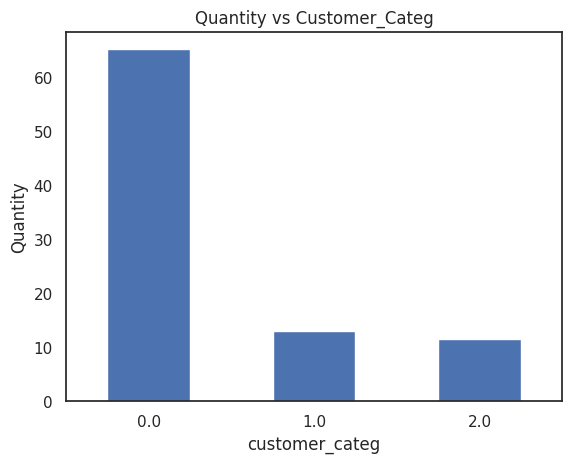

In [ ]:
(df_products.groupby(by=['customer_categ'])['Quantity'].mean().plot(kind='bar'))
plt.title("Quantity vs Customer_Categ")
plt.ylabel('Quantity')
plt.xticks(rotation = 0)
plt.show()

**Conclusion:**

1.From the E-Commerce transaction data, only unique values from the Product
  Description column were taken and Natural Language Processing techniques were applied to convert to numerical data

2.Then K-Means clustering is applied and used Silhouette_score plot for measure
  how dense and well separated the cluster are.

3.It can be used to slect the most optimal value of the k

4.I tried to group the customers into different clusters using similarity
  between products purchased between the users